## Final Project Submission

Please fill out:


- Group 2


Student name: 


***Alvin	Kimathi***

***Lynn	Oloo***

***Hawkins	Murithi***

***Firdosa	Mohamed***


* Student pace: FULL TIME/HYBRID

* Scheduled project review date/time: 2nd MAY 2024

* Instructor name: MARYANN MWIKALI

* Blog post URL:


### DATA UNDERSTANDING

***Importing libraries***

In [64]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


***Reading the Kc_house_data.csv Dataset***

In [65]:
df = pd.read_csv("data/kc_house_data.csv", index_col = 0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [66]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [67]:
df.shape

(21597, 20)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

The dataset contains 21,597 entries and 20 columns. Some columns have missing values, such as "waterfront", "view", and "yr_renovated". The data types include integers, floats, and objects (likely representing categorical variables).

***Reading the column_names.md Dataset***

In [69]:
with open('data/column_names.md', 'r') as file:
    md_lines = file.readlines()

df_col = pd.DataFrame({'Text': md_lines})

df_col

,Text
0,# Column Names and Descriptions for King Count...
1,* `id` - Unique identifier for a house\n
2,* `date` - Date house was sold\n
3,* `price` - Sale price (prediction target)\n
4,* `bedrooms` - Number of bedrooms\n
5,* `bathrooms` - Number of bathrooms\n
6,* `sqft_living` - Square footage of living spa...
7,* `sqft_lot` - Square footage of the lot\n
8,* `floors` - Number of floors (levels) in house\n
9,* `waterfront` - Whether the house is on a wat...


In [70]:
df_col.describe()

,Text
count,26
unique,26
top,* `lat` - Latitude coordinate\n
freq,1


In [71]:
df_col.shape

(26, 1)

In [72]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    26 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


The provided dataset consists of a single column named "Text" with 26 entries. Each entry is of type object (likely representing strings or text data). There are no missing values in the dataset. It seems to be a small dataset containing textual data, possibly representing individual text samples, comments, or descriptions.

## Data cleaning

At this point check for the existing columns and understand what the entail.

In [73]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Choose the best-looking predictors to include in the model.

In [74]:
new_df = df[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'view', 'condition', 'grade','yr_built']]
new_df

,price,bedrooms,sqft_living,sqft_lot,view,condition,grade,yr_built
id,,,,,,,,
7129300520,221900.0,3,1180,5650,NONE,Average,7 Average,1955
6414100192,538000.0,3,2570,7242,NONE,Average,7 Average,1951
5631500400,180000.0,2,770,10000,NONE,Average,6 Low Average,1933
2487200875,604000.0,4,1960,5000,NONE,Very Good,7 Average,1965
1954400510,510000.0,3,1680,8080,NONE,Average,8 Good,1987
...,...,...,...,...,...,...,...,...
263000018,360000.0,3,1530,1131,NONE,Average,8 Good,2009
6600060120,400000.0,4,2310,5813,NONE,Average,8 Good,2014
1523300141,402101.0,2,1020,1350,NONE,Average,7 Average,2009


Use `.info()` to check for missing data in the columns

In [75]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   sqft_living  21597 non-null  int64  
 3   sqft_lot     21597 non-null  int64  
 4   view         21534 non-null  object 
 5   condition    21597 non-null  object 
 6   grade        21597 non-null  object 
 7   yr_built     21597 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


we see that the column `view` has some missing data but since they are very few and will have little or no effect on our analysis we decide to use `dropna` to drop the rows.

In [76]:
new_df = new_df.dropna()

we again do `.info()` to see the output of our analysis.

In [77]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21534 non-null  float64
 1   bedrooms     21534 non-null  int64  
 2   sqft_living  21534 non-null  int64  
 3   sqft_lot     21534 non-null  int64  
 4   view         21534 non-null  object 
 5   condition    21534 non-null  object 
 6   grade        21534 non-null  object 
 7   yr_built     21534 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


At this point we now see that all our columns have the same no of rows having non- null values hence we are ready to fodge a step forward.

## EXPLORATORY DATA ANALYSIS

The stage involve exploration process, which involves generating and plotting histograms and box plots. This step allows us to gain insight into the distribution patterns of the data for each variable. By visualizing the histograms, we can better comprehend the spread and frequency of values within each variable, providing a foundation for further analysis. Box plots help us identify potential outliers.

## Univariate Analysis

#first lets check the unique values in grade and lets convert it into numeric values


In [78]:
new_df.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [79]:
# Define a function to extract the numeric grade from the grade column
def extract_numeric_grade(s):
    numeric_str = ''
    for char in s:
        if char.isdigit():
            numeric_str += char
    return int(numeric_str)

# Define a function to extract the grade description from the grade column
def extract_grade_desc(s):
    grade_desc = ''
    for char in s:
        if not char.isdigit() and char != ' ':
            grade_desc += char
    return grade_desc.strip()

# Extract the numeric grade and grade description using the custom functions
new_df['numeric_grade'] = new_df['grade'].apply(lambda x: extract_numeric_grade(x))
new_df['grade_desc'] = new_df['grade'].apply(lambda x: extract_grade_desc(x))

new_df.head()

<ipython-input-79-700df404da3e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['numeric_grade'] = new_df['grade'].apply(lambda x: extract_numeric_grade(x))
<ipython-input-79-700df404da3e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['grade_desc'] = new_df['grade'].apply(lambda x: extract_grade_desc(x))


,price,bedrooms,sqft_living,sqft_lot,view,condition,grade,yr_built,numeric_grade,grade_desc
id,,,,,,,,,,
7129300520,221900.0,3,1180,5650,NONE,Average,7 Average,1955,7,Average
6414100192,538000.0,3,2570,7242,NONE,Average,7 Average,1951,7,Average
5631500400,180000.0,2,770,10000,NONE,Average,6 Low Average,1933,6,LowAverage
2487200875,604000.0,4,1960,5000,NONE,Very Good,7 Average,1965,7,Average
1954400510,510000.0,3,1680,8080,NONE,Average,8 Good,1987,8,Good


In [80]:
#function to remove outliers
def remove_outliers(new_df, cols):
    for col in cols:
        z = np.abs(stats.zscore(new_df[col]))
        threshold = 3
        new_df = new_df[z < threshold]
    return new_df

In [81]:
cols_to_remove_outliers = ['sqft_living','bedrooms','price',]
new_df = remove_outliers(new_df, cols_to_remove_outliers)

Descriptive Statistics for price
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64



<Figure size 864x576 with 0 Axes>

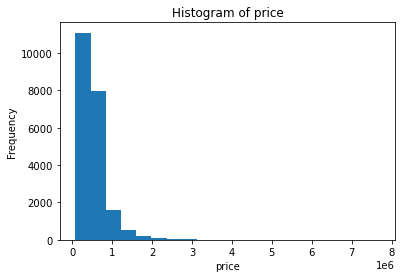

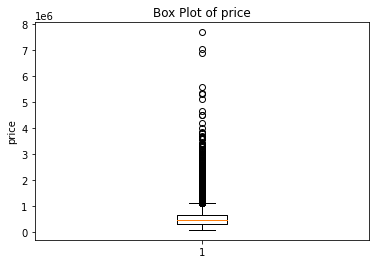

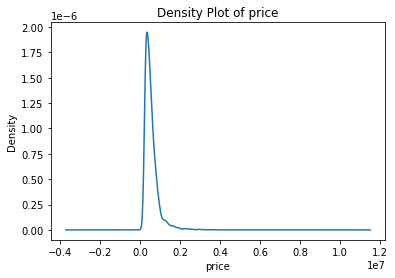

Descriptive Statistics for bedrooms
count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64



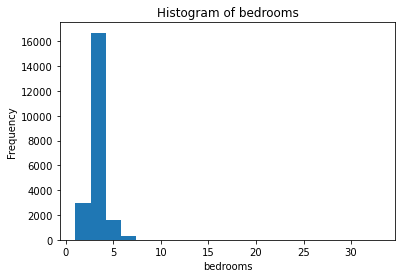

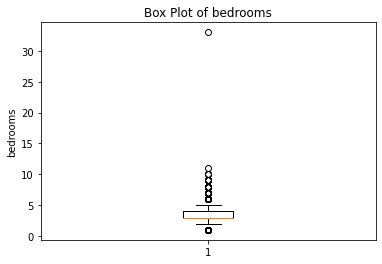

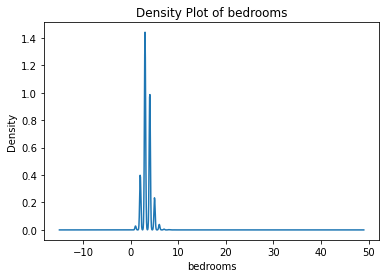

Descriptive Statistics for bathrooms
count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64



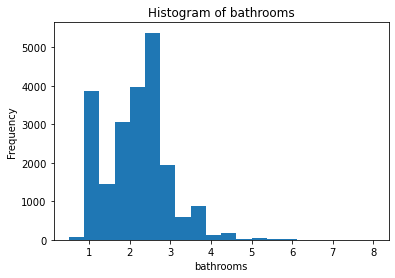

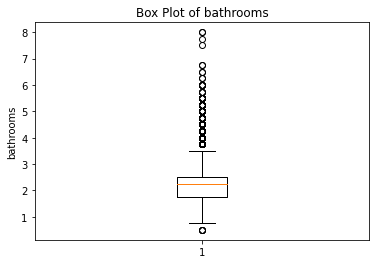

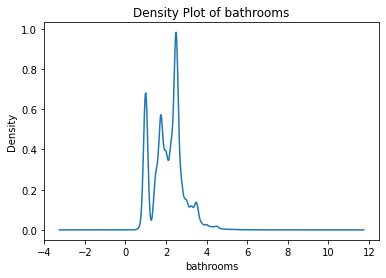

Descriptive Statistics for sqft_living
count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64



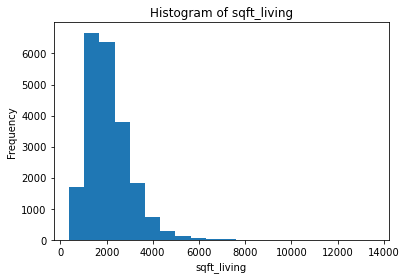

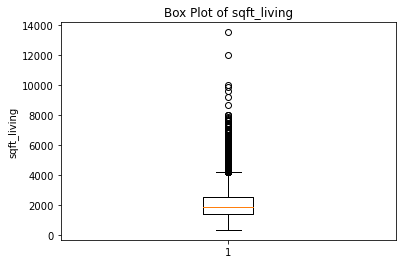

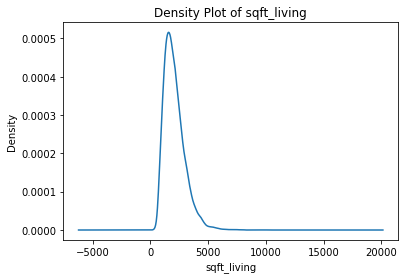

Descriptive Statistics for floors
count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64



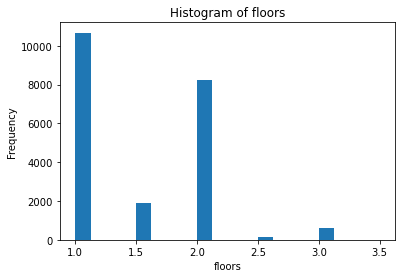

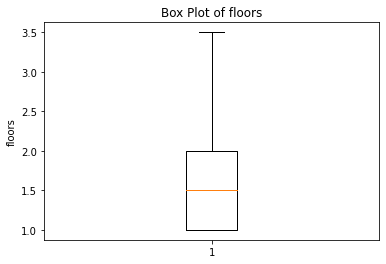

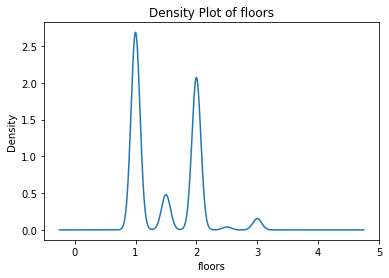

Descriptive Statistics for zipcode
count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64



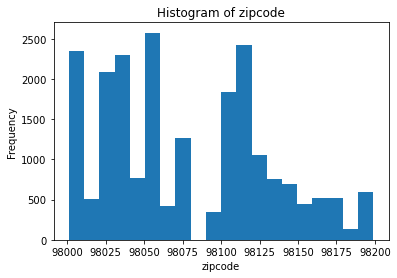

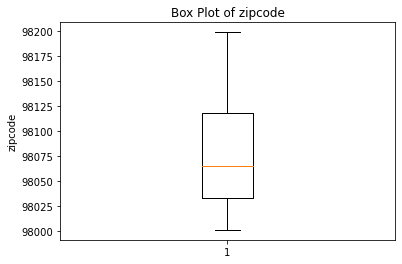

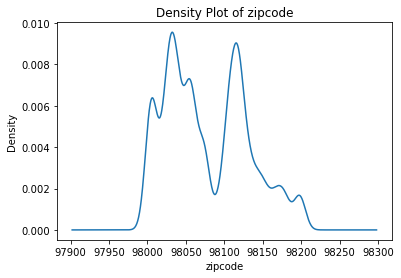

In [82]:
# Plotting Histogram, density plots and box plot

# Select the desired features
features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors','zipcode']
plt.figure(figsize=(12, 8))
ncols=3
nrows=4
# Perform univariate analysis for each feature
for feature in features:
    # Descriptive Statistics
    print('Descriptive Statistics for', feature)
    print(df[feature].describe())
    print()
    # Histogram
    plt.figure()
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + feature)
    plt.show()
    # Box Plot
    plt.figure()
    plt.boxplot(df[feature])
    plt.ylabel(feature)
    plt.title('Box Plot of ' + feature)
    plt.show()
    # Density Plot
    plt.figure()
    df[feature].plot(kind='density')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title('Density Plot of ' + feature)
    plt.show()

In [83]:
# To ascertain the median points of the dataset

df[['price','bedrooms', 'bathrooms', 'sqft_living', 'floors']].median()

price          450000.00
bedrooms            3.00
bathrooms           2.25
sqft_living      1910.00
floors              1.50
dtype: float64

* The distribution of house prices appears to be right-skewed, indicating a prevalence of relatively inexpensive houses with a smaller proportion of very expensive ones. Despite the presence of outliers in the box plot, we opted to retain them, presuming they accurately reflect the characteristics of the real-world dataset.

* Upon examining the plot, it's evident that for the feature "bedrooms," out of 15,676 counts, the mean is 3.37, with a standard deviation of 0.935 and a median of 3.0. This suggests that most houses possess either 3 or 4 bedrooms, with the exception of an outlier in the dataset. The distribution around the mean appears to be fairly uniform.

* For "bathrooms," the mean is 2.12, with a median of 2.25 and a standard deviation of 0.77. The dataset displays a right skew, and most houses are equipped with 2 bathrooms.

* Regarding "sqft_living," the mean area is 2080 square feet, with a standard deviation of 918.1 and a median of 1910. This indicates a distribution around the mean with slight variations, and most houses occupy approximately 2080 square feet of space.

* Analyzing the descriptive statistics for "floors," it becomes apparent that relatively few houses have 1 to 2 floors. The mean and median are both 1.5. The data points are dispersed, with the density curve indicating a concentration around the values of 1 and 2 floors.








## Bivariate Analysis

Bivariate analysis focuses on determining the correlation between two variables. At this stage we will use a heatmap and scatterplot to check on correlation of the variables.

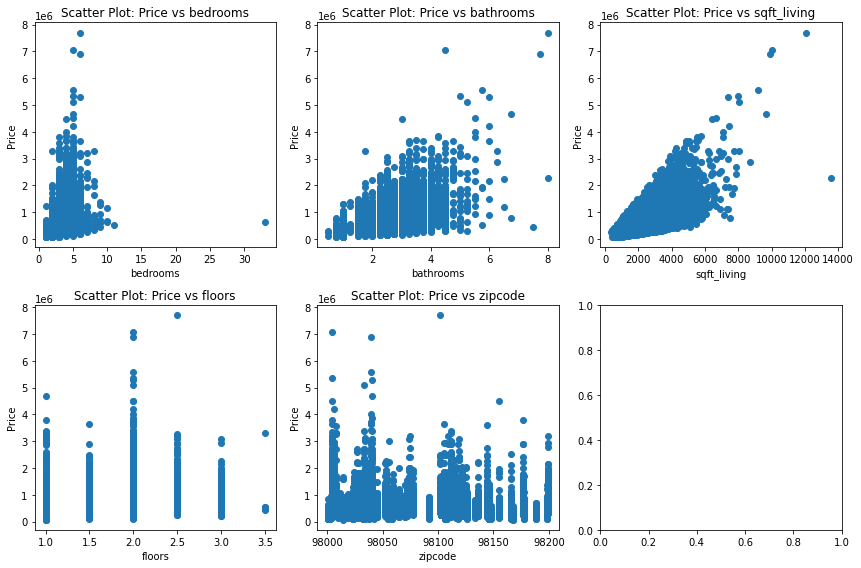

In [84]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors',
            'zipcode']

# Set the figure size and grid layout
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Perform bivariate analysis for each feature
for i, feature in enumerate(features):
    # Calculate the row and column index
    row = i // 3
    col = i % 3
    
    # Scatter Plot
    axs[row, col].scatter(df[feature], df['price'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Price')
    axs[row, col].set_title('Scatter Plot: Price vs ' + feature)

# Adjust the spacing between subplots
plt.tight_layout()


In [85]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_df = df[numeric_columns]

In [86]:
# Computing the correlation matrix to check for Linearity
numeric_df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


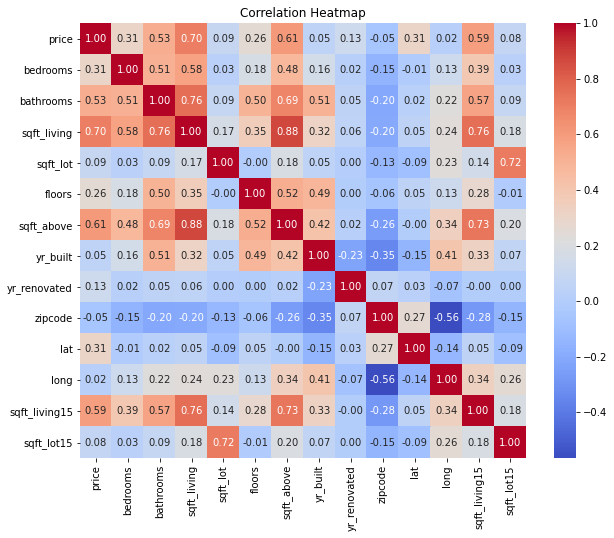

In [87]:
# Creating a heatmap using seaborn


corr_matrix = numeric_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title('Correlation Heatmap');


A heatmap is utilized to make it easier to identify relationships and correlations between variables or elements.




## Regression Analysis

#### Train/Test Split
Conduct a Train/Test split to our dataset to ensure the set of values to be used maintain oneness and use unseen data to prevent noise etc

In [88]:
#Define features to be used
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot","floors", "sqft_above","yr_built", "yr_renovated", "zipcode","lat", "long"]
target = "price"

In [89]:
x = numeric_df[features]
y = numeric_df[target]

#perfom train/test split with 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [90]:
#shape of our split data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(17277, 11) (17277,)
(4320, 11) (4320,)


In [91]:
#explore our data
print("Training set - Features:")
print(x_train.head())
print("\nTraining set - Target:")
print(y_train.head())
print("\nTesting set - Features:")
print(x_test.head())
print("\nTesting set - Target:")
print(y_test.head())

Training set - Features:
            bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
id                                                                           
9834201100         4       2.00         1440      4855     2.0        1440   
7795810110         3       1.75         1430      9857     1.0        1140   
1853081250         4       2.75         3120      5000     2.0        3120   
2558630350         4       2.50         2060      6958     1.0        1220   
3362401000         3       2.00         2500      4080     1.5        1680   

            yr_built  yr_renovated  zipcode      lat     long  
id                                                             
9834201100      1972           0.0    98144  47.5717 -122.287  
7795810110      1980           0.0    98045  47.4964 -121.771  
1853081250      2010           0.0    98074  47.5940 -122.062  
2558630350      1974           NaN    98034  47.7251 -122.168  
3362401000      1922           0.0    98103 

In [92]:
#Find out which columns have highest correlation to the price to determine which features best to use for our models as a higher correlation means the target is affected by increase/decrease of the other
correlation = numeric_df.corr()["price"].abs().sort_values(ascending=False)
correlation

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
Name: price, dtype: float64

From our results, we can deduce other than price(which is the target), sqft_living and sqft_above have the highest correlation efficients to the target hence very suitable to use in our SLR models

# Model 1 (SLR)
### Living Area Impact on Property Value

In [93]:
x_train_1 = sm.add_constant(x_train["sqft_living"])
slr_model_sqft = sm.OLS(y_train, x_train_1)
model_1 = slr_model_sqft.fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.676e+04
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:43:46   Log-Likelihood:            -2.4012e+05
No. Observations:               17277   AIC:                         4.802e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.645e+04   4961.972     -9.361      

#### Overall Interpretation and Analysis of Model 1(SLR)

From this Simple Linear regression model,where wee focused on Square foot living and how it impacts property value we can deduce;
* This model explains approximately 49.2% of variance in property value as shown by the R-squared value
* The model as a whole is statsistically significant as shown by a relatively Large F-stat and corresponding small P-value
* Coefficient for sqft_living indicates for an additional square foot, the price of the property increases by approximately $282.20
Overall this SLR model suggests that sqft_living(areao occupied by property) is a significant predictor for property value, however there is room for improvement.

# Model 2 (SLR)
### Square feet above impact on Property Value

In [94]:
x_train_2 = sm.add_constant(x_train["sqft_above"])
slr_model_bedrooms = sm.OLS(y_train, x_train_2)
model_2 = slr_model_bedrooms.fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     9874.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:43:47   Log-Likelihood:            -2.4207e+05
No. Observations:               17277   AIC:                         4.842e+05
Df Residuals:                   17275   BIC:                         4.842e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.922e+04   5345.309     11.079      0.0

#### Overall Interpretation and Analysis of Model 2(SLR)

From this Simple Linear Regression Model we focused on Sqft_above and how it affects property of value as computed above;
* This model explains for approximately 36.4% variance in property value but compared to our model, its R-squared value has decreased suggesting lower predictive power by the model.
* This model is statistically significant as indicated by the F-stat and corresponding low P-value
* Coefficient of the Sqft_avbove is approciamtely 269.39 indicating that for an additional sqft_above, the property value increases by $269.39
Overally as much as the model is statistically significant, there is room for improvement as our predicitive perfomance has decreased compared to our fist model.

# MODEL 3 (MLR)
### Bedrooms, Sqft_living and floors impact on property value

In [95]:
x_train_3 = sm.add_constant(x_train[["bedrooms", "sqft_living", "floors"]])
model_3 = sm.OLS(y_train , x_train_3).fit()
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     5948.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:43:47   Log-Likelihood:            -2.3985e+05
No. Observations:               17277   AIC:                         4.797e+05
Df Residuals:                   17273   BIC:                         4.797e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.418e+04   8755.773      9.614      

#### Overall Interpretation and Analysis of Model 3(MLR)

In this case, we decided to incorporate multiple factors into our model and in this case we focused on bedrooms, Sqft_living and floors impact on property value and we can deduce:
* This model approximately accounts for 50.8% for the variance on property value affected by the highlighted factors.We account for an improvement in model predictive power as compared to our two previous models
* The model is statistically significant with an F-stat of 5948 and a corresponding p-value that is close to zero.
* Further investigation into this model,we can enhance the model's perfomance by checking for multicollinearity and significance of each predictor variable to refine the model.

# MODEL 4(MLR)
### Sqft_living , Sqft_above and Bathrooms impact on Property Value

In [96]:
x_train_4 = sm.add_constant(x_train[["sqft_living", "sqft_above", "bathrooms"]])
model_4 = sm.OLS(y_train , x_train_4).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     5600.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:43:47   Log-Likelihood:            -2.4011e+05
No. Observations:               17277   AIC:                         4.802e+05
Df Residuals:                   17273   BIC:                         4.803e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.166e+04   5905.584     -7.054      

#### Overall Interpretation and Analysis of Model 4(MLR)

From this Multi Linear Regression model, we focused on Sqft_living , Sqft_above and Bathrooms impact on Property Value and we can deduce;
* This model explains approximately 49.3% variance in prediction for property value from the R-squared value
* The model is statistically significant as shown by our F-stat 5600 and corresponding P-value close to zero
* Sqft_above and Bathrooms coefficient inidcate an increase and decrease in by $300.61 and $21.75 respectively in property value
Overally this model shows a moderate predictive power.However in this case the 'bathrooms' variable may not be statistically significant in house prices for this model.Further investication and refining proves this model has room for improvement.


# MODEL 5 (MLR)
### Sqft_living, Sqft_above, Bedrooms and Bathrooms impact on Property Value

In [97]:
x_train_5 = sm.add_constant(x_train[["sqft_living", "sqft_above","bedrooms", "bathrooms"]])
model_5 = sm.OLS(y_train , x_train_5).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     4483.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:43:47   Log-Likelihood:            -2.3983e+05
No. Observations:               17277   AIC:                         4.797e+05
Df Residuals:                   17272   BIC:                         4.797e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.983e+04   7988.139     11.246      

#### Overall Interpretation and Analysis of Model 5(MLR)

From this MLR  model we focused on Sqft_living, Sqft_above, Bedrooms and Bathrooms impact on Property Value and we can deduce;
* This model explains for approximately 50.9% variance in house prices by our predictor variables as shown by our R-squared value.
* The model is statistically significant as a whole as shown by the F-stat 4483 and a corresponding P-value close to zero
Further investigation into significance of each variable and potentiall multicolinearity may be necessary to refine our models further

